In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file into a DataFrame
df = pd.read_csv('Monthly_COVID-19_Death_Rates_per_100_000_Population_by_Age_Group__Race_and_Ethnicity__Sex__and_Region_with_Double_Stratification_20241106.csv')

# Display the first few rows
print("First 5 rows:")
print(df.head())

First 5 rows:
   data_as_of jurisdiction_residence data_period_start data_period_end group  \
0  10/17/2024               Region 1        01/01/2020      01/31/2020   Age   
1  10/17/2024               Region 1        02/01/2020      02/29/2020   Age   
2  10/17/2024               Region 1        03/01/2020      03/31/2020   Age   
3  10/17/2024               Region 1        04/01/2020      04/30/2020   Age   
4  10/17/2024               Region 1        05/01/2020      05/31/2020   Age   

   subgroup1 subgroup2  covid_deaths  crude_rate  conf_int_95pct_lower_crude  \
0  0-4 years       NaN           0.0        0.00                         0.0   
1  0-4 years       NaN           0.0        0.00                         0.0   
2  0-4 years       NaN           1.0        0.14                         0.0   
3  0-4 years       NaN           0.0        0.00                         0.0   
4  0-4 years       NaN           0.0        0.00                         0.0   

   conf_int_95pct_upper_

In [119]:

# Get basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
        covid_deaths    crude_rate  conf_int_95pct_lower_crude  \
count   61026.000000  61026.000000                61026.000000   
mean      235.693311      8.269130                    6.678270   
std      1765.340309     34.304165                   29.965646   
min         0.000000      0.000000                    0.000000   
25%         0.000000      0.000000                    0.000000   
50%         0.000000      0.000000                    0.000000   
75%        29.000000      2.260000                    1.510000   
max    105339.000000   1466.300000                 1417.240000   

       conf_int_95pct_upper_crude  
count                61026.000000  
mean                     9.870966  
std                     39.358366  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      2.900000  
max                   1515.350000  


In [120]:
total_deaths = df['covid_deaths'].sum() 
print(f"Total deaths: {total_deaths:,}")

Total deaths: 14,383,420.0


In [121]:
# Function to get total covid deaths for a given group 
def total_covid_deaths_by_col(df, col, group_column): 
    #return df.groupby(group_column)['covid_deaths'].sum()
    return df[df[col] == group_column]['covid_deaths'].sum()

In [122]:
groups = ["Age", "Race", "Sex", "All"]

for group in groups:
    print(f"{group}: {total_covid_deaths_by_col(df, col="group", group_column=group)}")

Age: 2413914.0
Race: 2398104.0
Sex: 2413942.0
All: 2413942.0


In [123]:
df_race = df[df['group'] == "Race"]
df_race

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note
627,10/17/2024,Region 1,01/01/2020,01/31/2020,Race,Hispanic,NaN,0.0,0.00,0.00,0.00,NaN
628,10/17/2024,Region 1,02/01/2020,02/29/2020,Race,Hispanic,NaN,0.0,0.00,0.00,0.00,NaN
629,10/17/2024,Region 1,03/01/2020,03/31/2020,Race,Hispanic,NaN,22.0,1.21,0.70,1.71,NaN
630,10/17/2024,Region 1,04/01/2020,04/30/2020,Race,Hispanic,NaN,516.0,28.28,25.84,30.72,NaN
631,10/17/2024,Region 1,05/01/2020,05/31/2020,Race,Hispanic,NaN,383.0,20.99,18.89,23.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11281,10/17/2024,United States,05/01/2024,05/31/2024,Race,Non-Hispanic White,NaN,1215.0,0.62,0.58,0.65,NaN
11282,10/17/2024,United States,06/01/2024,06/30/2024,Race,Non-Hispanic White,NaN,1270.0,0.65,0.61,0.68,NaN
11283,10/17/2024,United States,07/01/2024,07/31/2024,Race,Non-Hispanic White,NaN,2267.0,1.15,1.10,1.20,NaN
11284,10/17/2024,United States,08/01/2024,08/31/2024,Race,Non-Hispanic White,NaN,3964.0,2.01,1.95,2.08,NaN


In [124]:
subgroups = df_race["subgroup1"].unique()

sum = 0
for subgroup in subgroups:
    tmp = total_covid_deaths_by_col(df_race, "subgroup1", subgroup)
    print(f"{subgroup}: {tmp}")
    sum+=tmp
    
print(sum)

Hispanic: 350436.0
Non-Hispanic American Indian or Alaska Native: 24946.0
Non-Hispanic Asian: 75512.0
Non-Hispanic Black: 325346.0
Non-Hispanic Native Hawaiian or Other Pacific Islander: 4742.0
Non-Hispanic White: 1617122.0
2398104.0


In [125]:
df_race["subgroup2"].unique()

array([nan], dtype=object)

In [126]:
mask = df["jurisdiction_residence"] == "United States"
df_us = df[mask]
df_us

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note
10260,10/17/2024,United States,01/01/2020,01/31/2020,Age,0-4 years,NaN,0.0,0.00,0.00,0.00,NaN
10261,10/17/2024,United States,02/01/2020,02/29/2020,Age,0-4 years,NaN,0.0,0.00,0.00,0.00,NaN
10262,10/17/2024,United States,03/01/2020,03/31/2020,Age,0-4 years,NaN,4.0,0.02,0.00,0.04,Rates for death counts <20 should be interpret...
10263,10/17/2024,United States,04/01/2020,04/30/2020,Age,0-4 years,NaN,5.0,0.03,0.00,0.05,Rates for death counts <20 should be interpret...
10264,10/17/2024,United States,05/01/2020,05/31/2020,Age,0-4 years,NaN,7.0,0.04,0.01,0.06,Rates for death counts <20 should be interpret...
...,...,...,...,...,...,...,...,...,...,...,...,...
78997,10/17/2024,United States,05/01/2024,05/31/2024,Age and Race,75+ years,Non-Hispanic White,864.0,5.07,4.73,5.41,NaN
78998,10/17/2024,United States,06/01/2024,06/30/2024,Age and Race,75+ years,Non-Hispanic White,964.0,5.66,5.30,6.02,NaN
78999,10/17/2024,United States,07/01/2024,07/31/2024,Age and Race,75+ years,Non-Hispanic White,1687.0,9.90,9.43,10.38,NaN
79000,10/17/2024,United States,08/01/2024,08/31/2024,Age and Race,75+ years,Non-Hispanic White,3030.0,17.79,17.15,18.42,NaN


In [127]:
groups = ["Age", "Race", "Sex", "All"]

for group in groups:
    print(f"{group}: {total_covid_deaths_by_col(df_us, col="group", group_column=group)}")

Age: 1206957.0
Race: 1199052.0
Sex: 1206971.0
All: 1206971.0


In [128]:
df_regions = df[~mask]
df_regions

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note
0,10/17/2024,Region 1,01/01/2020,01/31/2020,Age,0-4 years,NaN,0.0,0.00,0.00,0.00,NaN
1,10/17/2024,Region 1,02/01/2020,02/29/2020,Age,0-4 years,NaN,0.0,0.00,0.00,0.00,NaN
2,10/17/2024,Region 1,03/01/2020,03/31/2020,Age,0-4 years,NaN,1.0,0.14,0.00,0.40,Rates for death counts <20 should be interpret...
3,10/17/2024,Region 1,04/01/2020,04/30/2020,Age,0-4 years,NaN,0.0,0.00,0.00,0.00,NaN
4,10/17/2024,Region 1,05/01/2020,05/31/2020,Age,0-4 years,NaN,0.0,0.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75919,10/17/2024,Region 9,05/01/2024,05/31/2024,Age and Race,75+ years,Non-Hispanic White,112.0,5.70,4.64,6.75,NaN
75920,10/17/2024,Region 9,06/01/2024,06/30/2024,Age and Race,75+ years,Non-Hispanic White,158.0,8.04,6.79,9.29,NaN
75921,10/17/2024,Region 9,07/01/2024,07/31/2024,Age and Race,75+ years,Non-Hispanic White,227.0,11.55,10.05,13.05,NaN
75922,10/17/2024,Region 9,08/01/2024,08/31/2024,Age and Race,75+ years,Non-Hispanic White,319.0,16.23,14.45,18.01,NaN


In [129]:
groups = ["Age", "Race", "Sex", "All", "Age and Race", "Race and Age"]
print(df_regions["group"].unique())

for group in groups:
    print(f"{group}: {total_covid_deaths_by_col(df_regions, col="group", group_column=group)}")

['Age' 'All' 'Sex' 'Race' 'Race and Age' 'Age and Race']
Age: 1206957.0
Race: 1199052.0
Sex: 1206971.0
All: 1206971.0
Age and Race: 1175980.0
Race and Age: 1175980.0


In [130]:
# Convert the date columns to datetime 
df['data_period_start'] = pd.to_datetime(df['data_period_start']) 
df['data_period_end'] = pd.to_datetime(df['data_period_end']) 

# Find the time range 
start_date = df['data_period_start'].min() 
end_date = df['data_period_end'].max() 

print(f"Time range: {start_date.date()} to {end_date.date()}")

Time range: 2020-01-01 to 2024-09-30


In [131]:
# Filter rows where none of the specified columns are empty -> Rows with double stratification

df_double_strat = df_us.dropna(subset=['group', 'subgroup1', 'subgroup2']) 
df_double_strat

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note
42066,10/17/2024,United States,01/01/2020,01/31/2020,Race and Age,Hispanic,0-4 years,0.0,0.00,0.00,0.00,NaN
42067,10/17/2024,United States,02/01/2020,02/29/2020,Race and Age,Hispanic,0-4 years,0.0,0.00,0.00,0.00,NaN
42068,10/17/2024,United States,03/01/2020,03/31/2020,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
42069,10/17/2024,United States,04/01/2020,04/30/2020,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
42070,10/17/2024,United States,05/01/2020,05/31/2020,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
...,...,...,...,...,...,...,...,...,...,...,...,...
78997,10/17/2024,United States,05/01/2024,05/31/2024,Age and Race,75+ years,Non-Hispanic White,864.0,5.07,4.73,5.41,NaN
78998,10/17/2024,United States,06/01/2024,06/30/2024,Age and Race,75+ years,Non-Hispanic White,964.0,5.66,5.30,6.02,NaN
78999,10/17/2024,United States,07/01/2024,07/31/2024,Age and Race,75+ years,Non-Hispanic White,1687.0,9.90,9.43,10.38,NaN
79000,10/17/2024,United States,08/01/2024,08/31/2024,Age and Race,75+ years,Non-Hispanic White,3030.0,17.79,17.15,18.42,NaN


/tmp/ipykernel_53861/2841257655.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[plot_column] = shorten_labels(filtered_df[plot_column])


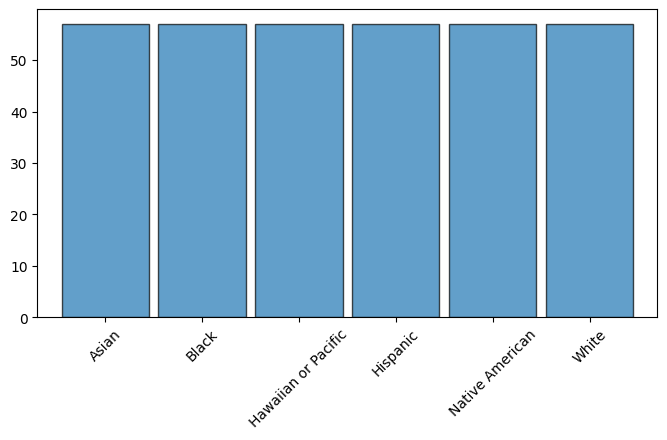

In [132]:

# Function to shorten the label names
def shorten_labels(input_list):
    transformed_list = []
    for item in input_list:
        # Remove "Non-Hispanic"
        new_item = item.replace("Non-Hispanic ", "")
        # Shorten specific names
        if new_item == "American Indian or Alaska Native":
            new_item = "Native American"
        elif new_item == "Native Hawaiian or Other Pacific Islander":
            new_item = "Hawaiian or Pacific"
        transformed_list.append(new_item)
    return transformed_list

def plot_frequencies_for_specific_value(df, filter_column, filter_value, plot_column):
    """
    Plots the frequencies of unique values for a given column, filtered by a specific value in another column.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    filter_column (str): The name of the column to filter by.
    filter_value: The value to filter the filter_column by.
    plot_column (str): The name of the column to plot unique value frequencies for.
    """
    # Check if both columns exist in the DataFrame
    if filter_column in df.columns and plot_column in df.columns:
        # Filter the DataFrame by the specified value in the filter column
        filtered_df = df[df[filter_column] == filter_value]
        
        if not filtered_df.empty:
            # Shorten the labels in the plot column
            filtered_df[plot_column] = shorten_labels(filtered_df[plot_column])
            
            # Plot the frequencies of the unique values in the plot column
            #plt.figure(figsize=(10, 6))
            plt.figure(figsize=(8, 4))
            value_counts = filtered_df[plot_column].value_counts().sort_index()
            value_counts.plot(kind='bar', width=0.9, edgecolor='k', alpha=0.7)
            #plt.title(f'Frequency of {plot_column} for {filter_column} = {filter_value}')
            plt.xlabel('')
            plt.xticks(rotation=45)
            plt.savefig(f"../figures/histogram_{filter_column}={filter_value}_{plot_column}.png", bbox_inches='tight')
            plt.show()
        else:
            print(f"No rows found with {filter_column} = {filter_value}")
    else:
        print(f"One or both columns '{filter_column}' or '{plot_column}' do not exist in the DataFrame.")

# Plot frequencies of 'Race' where 'group' is 'Race'
plot_frequencies_for_specific_value(df_us, 'group', 'Race', 'subgroup1')

# TODO => This shows, that 57/12 = 4,75 years of data are included for all races(2020-2023 + 2024 3/4 = 1.1.2020 - 30.9.2024) (Completeness)
# TODO => This also shows, that the time interval is complete

In [133]:
empty_covid_deaths = df[df['covid_deaths'].isna()]
empty_covid_deaths

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,subgroup1,subgroup2,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note
11297,10/17/2024,Region 1,2020-12-01,2020-12-31,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
11300,10/17/2024,Region 1,2021-03-01,2021-03-31,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
11309,10/17/2024,Region 1,2021-12-01,2021-12-31,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
11311,10/17/2024,Region 1,2022-02-01,2022-02-28,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
11312,10/17/2024,Region 1,2022-03-01,2022-03-31,Race and Age,Hispanic,0-4 years,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
...,...,...,...,...,...,...,...,...,...,...,...,...
78832,10/17/2024,United States,2020-02-01,2020-02-29,Age and Race,50-64 years,Non-Hispanic White,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
78888,10/17/2024,United States,2020-01-01,2020-01-31,Age and Race,65-74 years,Non-Hispanic White,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
78889,10/17/2024,United States,2020-02-01,2020-02-29,Age and Race,65-74 years,Non-Hispanic White,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...
78945,10/17/2024,United States,2020-01-01,2020-01-31,Age and Race,75+ years,Non-Hispanic White,NaN,NaN,NaN,NaN,Double-stratified death counts between 1-9 are...


In [134]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(df, column_name):
    """
    Plots a histogram of the values in a specified column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    # Check if the column exists in the DataFrame
    if column_name in df.columns:
        # Plot the histogram
        plt.figure(figsize=(10, 6))
        plt.hist(df[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

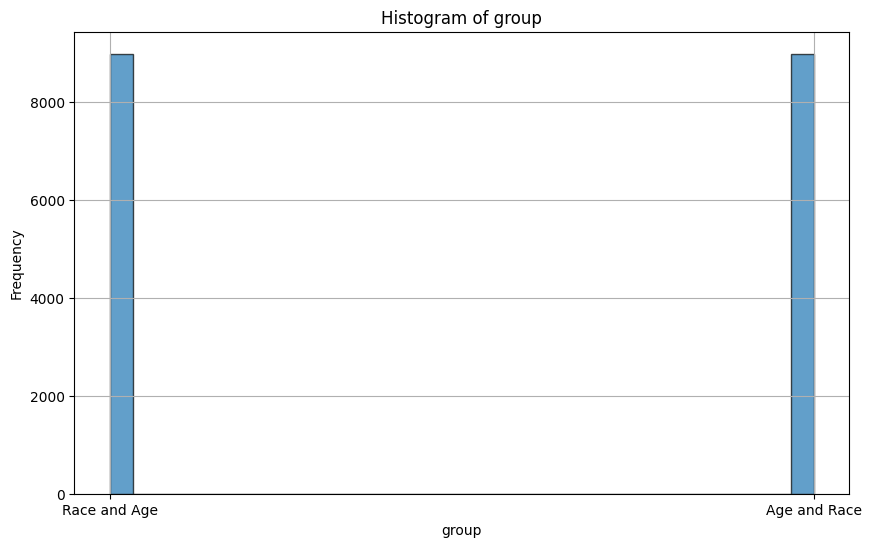

In [135]:
plot_histogram(empty_covid_deaths, "group")